# PROYECTO FINAL INGENIERIA DE SOFTWARE 3

Integrantes: 

    - Sergio Nelson Alberto Gómez Gil-2214106
    - Juan Pablo Avila Quitian-2214107
    - Juan David Saavedra Gónzalez-2214111
    

# 1. Introducción

Este proyecto final se centra en el análisis empírico del comportamiento de una aplicación bajo distintos escenarios de despliegue, utilizando **Docker Compose** y **Kubernetes**. 

Nosotros como estudiantes desplegaremos una aplicación en configuraciones que varían desde un único contenedor hasta clústeres de Kubernetes con diferentes niveles de escalabilidad (número de réplicas y nodos). 

El objetivo principal es observar y cuantificar métricas de rendimiento clave, como el **tiempo medio de respuesta** y el **throughput**, bajo diferentes cargas, para luego analizar cómo el entorno de despliegue impacta en la aplicación y extraer conclusiones sobre su **escalabilidad** y **eficiencia**.

---

# 2. Objetivo General

Analizar el comportamiento de una aplicación bajo diferentes escenarios de despliegue utilizando herramientas de contenedores como **Docker Compose** y de orquestación como **Kubernetes**, observando métricas de rendimiento y escalabilidad para comprender las implicaciones de cada configuración, especialmente en lo referente al **escalado horizontal**.

---

# 3. Objetivos Específicos


- Desplegar una aplicación utilizando **Docker Compose** en un entorno de una única máquina.
- Desplegar la misma aplicación en un clúster de **Kubernetes** usando uno, dos y tres nodos, variando el número de réplicas de los servicios de la aplicación.
- Utilizar la herramienta **JMeter** para generar carga en la aplicación en cada escenario de despliegue y observar métricas clave como **tiempo medio de respuesta** y **throughput** (tasa de peticiones).
- Observar y registrar el comportamiento de las métricas bajo diferentes cargas y número de réplicas en cada escenario.
- Analizar las diferencias en el comportamiento de la aplicación entre los distintos escenarios de despliegue y las variaciones en el número de réplicas.
- Extraer conclusiones basadas en los datos observados sobre la **escalabilidad**, la **eficiencia de recursos** y las posibles **limitaciones** de cada escenario y configuración de réplicas.


# 3. Descripción Proyecto

Este proyecto de ingeniería de software tiene como objetivo desarrollar una plataforma
web eficiente y accesible para la compra de boletas, buscando obtener una experiencia
de usuario y una gestión de eventos optimizada. La plataforma permitirá a los usuarios
buscar eventos, seleccionar localidades, controlar la cantidad de ventas y vista de
informes.
A nivel técnico, el desarrollo se basará en tecnologías modernas de desarrollo web para
la facilidad de su uso e implementación. El sistema está diseñado para ofrecer una
experiencia de usuario fluida, cubriendo tanto las necesidades de los administradores
como las de los usuarios finales.

---

# 4. Metodología del JMETER

La configuración que se va a usar para poner a prueba el funcionamiento del despliegue seran las siguientes:

    - Threads: 2000
    - Ramp-up: 60
    - Loop Count: Forever
    - Duration: 10 minutos
    - Timer entre peticiones: 2s (Constant Timer)

Esta configuración de JMeter es ideal para realizar pruebas de carga intensiva o stress test, ya que simula 2000 usuarios concurrentes accediendo al sistema durante 10 minutos. El ramp-up de 60 segundos distribuye progresivamente la creación de los hilos (usuarios), evitando una sobrecarga repentina y permitiendo observar cómo responde el sistema ante un aumento gradual de tráfico. Al usar un loop infinito con duración definida, se garantiza que todos los hilos generen solicitudes de manera continua durante todo el período de prueba, lo cual es útil para medir estabilidad y rendimiento sostenido.

Además, establecer un Startup Delay de 2 segundos y controlar la vida útil de los hilos ayuda a sincronizar correctamente el inicio del test con herramientas de monitoreo, y asegura que todos los hilos trabajen durante el mismo intervalo. Esta combinación permite obtener métricas clave como tiempo de respuesta, throughput y tasa de errores bajo condiciones cercanas a un escenario de producción o incluso de sobrecarga, revelando cuellos de botella o límites de capacidad en el sistema evaluado.


---

# 5. Organizando los datos obtenidos en jmeter

### Instalando librerias necesarias

In [ ]:
!pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\gomez\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### importando las librerias

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Preparando los datos

In [ ]:
 #Cargar archivos fase 1
file_fase1 = "fase1.csv"

df1 = pd.read_csv(file_fase1)
# Agregar una columna para identificar el número de réplicas
df1["replicas"] = 1
# Combinar los datos en un solo DataFrame
df1_all = df1.copy()
#-------------------------------------

# Cargar los archivos fase 2
file2_1 = "fase2_1replica.csv"
file2_2 = "fase2_2replica.csv"
file2_3 = "fase2_3replica.csv"

df2_1 = pd.read_csv(file2_1)
df2_2 = pd.read_csv(file2_2)
df2_3 = pd.read_csv(file2_3)

# Agregar una columna para identificar el número de réplicas
df2_1["replicas"] = 1
df2_2["replicas"] = 2
df2_3["replicas"] = 3

# Combinar los datos en un solo DataFrame
df2_all = pd.concat([df2_1, df2_2, df2_3], ignore_index=True)

#-------------------------------------

# Cargar los archivos fase 3
file3_1 = "fase3_1replica.csv"
file3_2 = "fase3_2replica.csv"
file3_3 = "fase3_3replica.csv"

df3_1 = pd.read_csv(file3_1)
df3_2 = pd.read_csv(file3_2)
df3_3 = pd.read_csv(file3_3)
# Agregar una columna para identificar el número de réplicas
df3_1["replicas"] = 1
df3_2["replicas"] = 2
df3_3["replicas"] = 3
# Combinar los datos en un solo DataFrame
df3_all = pd.concat([df3_1, df3_2, df3_3], ignore_index=True)
#-------------------------------------



In [ ]:
# Limpiar y convertir valores
df1_all['Error %'] = df1_all['Error %'].str.replace('%', '').astype(float)
df1_all['Throughput'] = pd.to_numeric(df1_all['Throughput'], errors='coerce')
# Filtrar solo las filas resumen de cada archivo
df_total1 = df1_all[df1_all["Label"] == "TOTAL"].copy()
df_total1 = df_total1.sort_values(by="replicas")

df2_all['Error %'] = df2_all['Error %'].str.replace('%', '').astype(float)
df2_all['Throughput'] = pd.to_numeric(df2_all['Throughput'], errors='coerce')

# Filtrar solo las filas resumen de cada archivo
df_total2 = df2_all[df2_all["Label"] == "TOTAL"].copy()
df_total2 = df_total2.sort_values(by="replicas")

# Limpiar y convertir valores
df3_all['Error %'] = df3_all['Error %'].str.replace('%', '').astype(float)
df3_all['Throughput'] = pd.to_numeric(df3_all['Throughput'], errors='coerce')

# Filtrar solo las filas resumen de cada archivo
df_total3 = df3_all[df3_all["Label"] == "TOTAL"].copy()
df_total3 = df_total3.sort_values(by="replicas")

## 5.1 Graficas de la fase 1

### 5.1.1. Tiempos de respuesta

C:\Users\gomez\AppData\Local\Temp\ipykernel_24044\1253549815.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='replicas', y='Average', data=df_total1, palette='Blues')


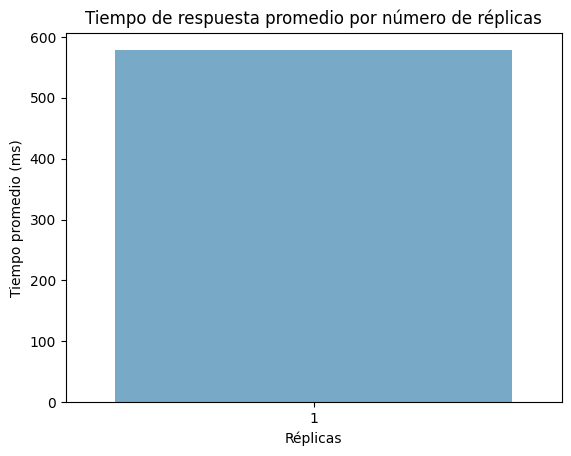

In [ ]:
sns.barplot(x='replicas', y='Average', data=df_total1, palette='Blues')
plt.title('Tiempo de respuesta promedio por número de réplicas')
plt.ylabel('Tiempo promedio (ms)')
plt.xlabel('Réplicas')
plt.show()

### 5.1.2. Throughput

C:\Users\gomez\AppData\Local\Temp\ipykernel_24044\1205091382.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='replicas', y='Throughput', data=df_total1, palette='Greens')


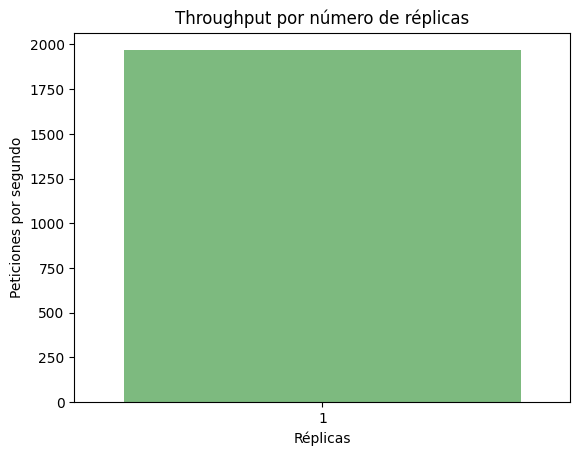

In [ ]:
sns.barplot(x='replicas', y='Throughput', data=df_total1, palette='Greens')
plt.title('Throughput por número de réplicas')
plt.ylabel('Peticiones por segundo')
plt.xlabel('Réplicas')
plt.show()

## 5.2 Graficas de la fase 2

### 5.2.1. Tiempos de respuesta

C:\Users\gomez\AppData\Local\Temp\ipykernel_24044\3063712576.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='replicas', y='Average', data=df_total3, palette='Blues')


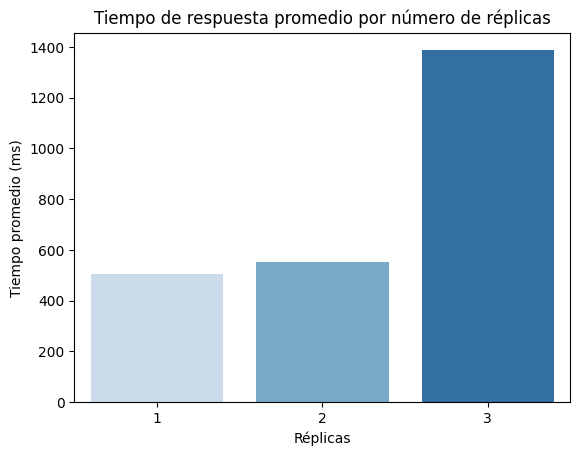

In [ ]:

sns.barplot(x='replicas', y='Average', data=df_total3, palette='Blues')
plt.title('Tiempo de respuesta promedio por número de réplicas')
plt.ylabel('Tiempo promedio (ms)')
plt.xlabel('Réplicas')
plt.show()

### 5.2.2. Throughput

C:\Users\gomez\AppData\Local\Temp\ipykernel_24044\1401419690.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='replicas', y='Throughput', data=df_total3, palette='Greens')


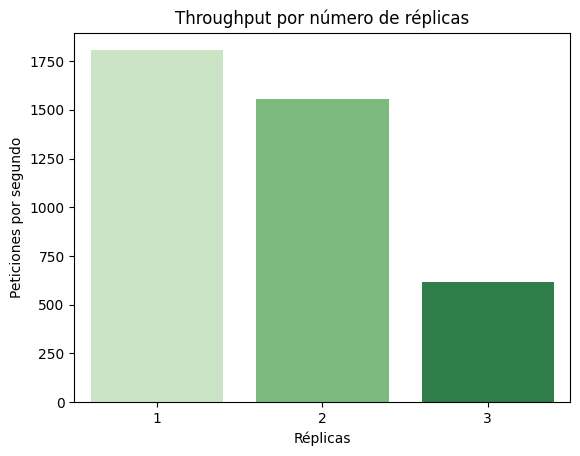

In [ ]:
sns.barplot(x='replicas', y='Throughput', data=df_total3, palette='Greens')
plt.title('Throughput por número de réplicas')
plt.ylabel('Peticiones por segundo')
plt.xlabel('Réplicas')
plt.show()

## 5.3 Graficas de la fase 3



### 5.3.1. Tiempos de respuesta

C:\Users\gomez\AppData\Local\Temp\ipykernel_24044\2534850917.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='replicas', y='Average', data=df_total3, palette='Blues')


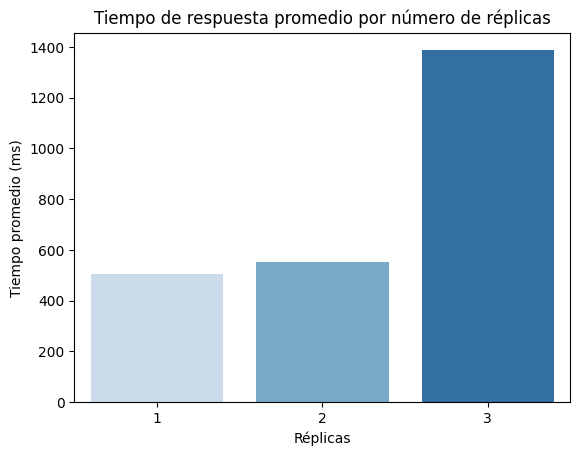

In [ ]:

sns.barplot(x='replicas', y='Average', data=df_total3, palette='Blues')
plt.title('Tiempo de respuesta promedio por número de réplicas')
plt.ylabel('Tiempo promedio (ms)')
plt.xlabel('Réplicas')
plt.show()



### 5.3.2. Throughput

C:\Users\gomez\AppData\Local\Temp\ipykernel_24044\3684250586.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='replicas', y='Throughput', data=df_total3, palette='Greens')


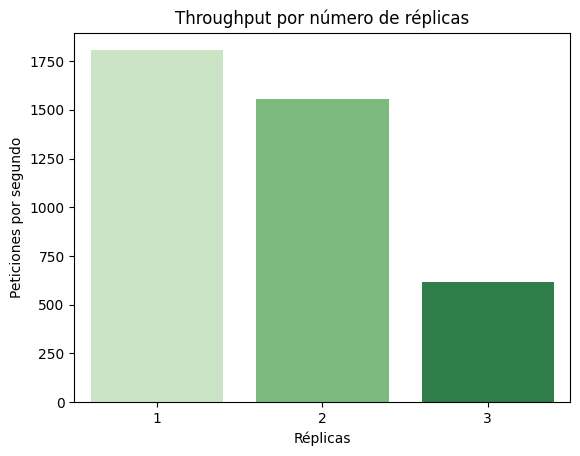

In [ ]:
sns.barplot(x='replicas', y='Throughput', data=df_total3, palette='Greens')
plt.title('Throughput por número de réplicas')
plt.ylabel('Peticiones por segundo')
plt.xlabel('Réplicas')
plt.show()



## 🔍 Análisis Consolidado

### Rendimiento por Fase y Réplica

| Fase  | Réplicas | Avg (ms) | Std. Dev. | Error % | Throughput (req/s) | Avg. Bytes |
|-------|----------|----------|-----------|---------|---------------------|-------------|
| 1     | -        | 578      | 1448.68   | 82.31%  | 1967.42             | 2806.1      |
| 2     | 1        | 571      | 1029.14   | 80.47%  | 2470.71             | 2829.6      |
| 2     | 2        | 765      | 2654.64   | 73.77%  | 2217.11             | 2940.7      |
| 2     | 3        | 923      | 2082.09   | 68.23%  | 1769.41             | 3054.8      |
| 3     | 1        | 504      | 2621.94   | 89.16%  | 1805.46             | 2669.7      |
| 3     | 2        | 551      | 2250.96   | 78.72%  | 1556.22             | 2846.5      |
| 3     | 3        | 1387     | 3650.16   | 55.10%  | 617.09              | 3286.1      |

### Observaciones Clave

- El throughput más alto se alcanzó con 1 réplica en la fase 2, indicando que más réplicas no siempre resultan en mejor rendimiento.
- El porcentaje de errores es elevado en todas las fases, especialmente en la fase 3 con 1 réplica (89.16%) y fase 1 (82.31%).
- El tiempo promedio (Average) aumenta notablemente a medida que se agregan réplicas en fase 3, con una latencia crítica de 1387 ms en 3 réplicas.
- El `Avg. Bytes` muestra un crecimiento con el número de réplicas, lo cual puede deberse a cargas mayores o a mayores volúmenes de datos procesados.

---



## ✅ Conclusiones

1. **No hay escalabilidad lineal con réplicas:** En lugar de mejorar, el rendimiento decrece en la mayoría de los casos al aumentar el número de réplicas, especialmente evidente en la fase 3.
2. **Elevado porcentaje de errores:** Todas las pruebas reportan tasas de error por encima del 50%, lo que compromete seriamente la confiabilidad del sistema bajo carga.
3. **La fase 2 es la más equilibrada:** Con una sola réplica, ofrece el mejor compromiso entre rendimiento (throughput) y tiempo de respuesta, aunque el error sigue siendo alto.
4. **Fase 3 no tolera bien la carga:** Incluso con pocas réplicas, su latencia y error son críticos.

---



## 📌 Recomendaciones

### Para el sistema:

- **Mejorar manejo de concurrencia:** El alto porcentaje de errores y la falta de escalabilidad sugieren cuellos de botella o mal diseño en el manejo de múltiples peticiones simultáneas.
- **Implementar control de calidad y validación de respuestas:** Los errores podrían estar relacionados con respuestas inesperadas o caídas silenciosas del servidor. Registrar y depurar esto es prioritario.
- **Ajustar configuración de red y servidores:** Validar límites de recursos, como hilos máximos, conexiones simultáneas, y memoria disponible por réplica.

### Para futuras pruebas:

- **Aumentar gradualidad en la carga:** Usar ramp-up controlado en JMeter y probar con diferentes perfiles de usuarios concurrentes.
- **Incluir métricas de sistema:** CPU, RAM, uso de disco y red para correlacionar fallas de aplicación con carga en infraestructura.
- **Incluir pruebas de estrés y endurance:** Para evaluar estabilidad a largo plazo bajo condiciones sostenidas.